## Example


<img src= 'gas_reactor.png' width = 650px />

Gas phase reaction: $2A -> B$
$$R_A = k_1 C_A^{1.5}$$

To begin we are going to make the following simplifying assumptions:
1. Isothermal system
2. Ideal gas behavior
3. $P_D$ = constant

i) Identify the state variables of the system.
 
ii) Set up a dynamic process model.

Inlet variable: $F_o(t)$, $\rho_o(t)$, $y_o(t)$

The inlet variables will most likely be specified.

Outlet variables: $F(t)$, $\rho(t)$, $y(t)$

So the variables that we need to determine in order to solve our system are $F(t)$, $\rho(t)$, $y(t)$, however, we are able to further describe our system with the following two relationships:

$$F(t) = f[P(t)]$$
$$\rho(t) = f[P(t),y(t)]$$

Therefore we will only require $P(t)$ and $y(t)$ to describe the system and these are our state variables.

So knowing this now we have to write two equations that we can use to solve for these state variables. A good place to start is with a mass balance:

$$\frac{d}{dt}\big(V\rho(t)\big) = F_o(t) \rho_o(t) - F(t) \rho(t)$$

And a component balance for A gives us:

$$\frac{d}{dt}\big(V C_A(t)\big) = F_o(t) C_Ao(t) - F(t)C_A(t) - 2Vk_1C_A(t)^{1.5}$$

The unknowns in these equations are $F(t)$, $\rho(t)$ and $C_A(t)$. So we will have to find more equations to solve for the unknowns. We can use the equation the explains the pressure drop over a resistance to describe the outlet flow rate:
$$F(t) = K\sqrt{\frac{P(t) - P_D}{\rho(t)}}$$

The density of the gas can be described with:

$$\rho (t) = \frac{M(t)P(t)}{RT}$$

Now we require an equation for the molar mass, $M(t)$:

$$M(t) = y(t)M_A + (1 - y(t))M_B$$

The concentration of A in the reactor, $C_A(t)$ can be calculated with the ideal gas law:

$$C_A(t) = \frac{y(t) P(t)}{RT}$$

We have added three unknowns P(t), M(t) and y(t), but we have also added four equations. 

Now we are able to substitute these equations into the two differential equation. Substituting the flow rate into mass balance we get:

$$\frac{d}{dt}\big(V\rho(t)\big) = F_o(t) \rho_o(t) - K\sqrt{\frac{P(t) - P_D}{\rho(t)}} \rho(t)$$

Now we can simplify and substitute for the density and molar mass:

$$\frac{V}{RT}\frac{d}{dt}\big((y(t)M_A + (1 - y(t))M_B)P(t)\big) = F_o(t) \rho_o(t) - K\sqrt{\frac{(P(t) - P_D)((y(t)M_A + (1 - y(t))M_B)P(t))}{RT}} $$

And now for the component balance we follow the same procedure as we did with the mass balance:

$$\frac{V}{RT}\frac{d}{dt}\big({y(t) P(t)}\big) = F_o(t) C_Ao(t) - K\sqrt{\frac{(P(t) - P_D)RT}{(y(t)M_A + (1 - y(t))M_B)P(t)}}\frac{y(t) P(t)}{RT} - 2Vk_1 \big(\frac{y(t) P(t)}{RT}\big)^{1.5}$$

Now we have two differential equations and two unknowns.

Identify the nonlinear terms in the equations above.

# Linearisation

Many system posses nonlinear input output relationships, examples include:
$$f(x,y) = ax^y$$
$$f(x,y) = a x y$$
$$f(x) = ax^n$$
$$f(x) = a^x$$

The problem with nonlinear terms is that the analytical solution of ordinary differential equations is difficult and Classical process control theory has been developed for linear processes. The solution to the problem is that we are going to linearise all the nonlinear term, however the downside is that it results in an approximation.

### First order Taylor series expansion

$$f(x) = nonlinear$$
$$\approx f(\bar{x}) + \dfrac{df}{dx}\Big|_{x = \bar{x}} \big(x - \bar{x}\big) + \dfrac{d^2 f}{dx^2}\Big|_{x = \bar{x}} \big(x - \bar{x}\big)^2 \frac{1}{2!} + \dfrac{d^n f}{dx^n}\Big|_{x = \bar{x}} \big(x - \bar{x}\big)^n \frac{1}{n!}$$

Although this would be a very accurate approximation is it still a nonlinear polynomial, we therefore have to limit the expansion to the first derivative.

$$f(x) \approx f(\bar{x}) + \dfrac{df}{dx}\Big|_{x = \bar{x}} \big(x - \bar{x}\big)$$
$$\approx k_1 + mx - m\bar{x}$$
$$\approx mx + c$$

And this results in linear relationship.

Linearisation is always relative to a reference condition, for our purposes in process dynamic and control the relative condition is the nominal steady state operating condition.

<img src = 'linearise.png'/>

In [2]:
import sympy
sympy.init_printing()

Valve equation
==========

Let's linearise the nasty nonlinear term in the equation percentage valve relationship in T4 Problem 4 (or T2 problem 4)

$$ F = \underbrace{C_v \alpha^{x - 1}}_{\text{nonlinear}} $$

First we introduce the requisite symbols. Notice that we specify constraints on these variables, this will make simplifications better later on.

In [3]:
C_v, alpha, x = sympy.symbols('C_v, alpha, x', positive=True)

In [4]:
term = C_v*alpha**(x - 1)
term

We also introduce a barred versions of the variable. Sympy automatically constructs these to typesetting nicely.

In [5]:
xbar = sympy.symbols('xbar', positive=True)
xbar

For single variable expressions, we can use `sympy.series` to linearise for us. Note that the help for `sympy.series` references the help for `sympy.Expr.series`, which has a lot more detail about the operation of this function

In [6]:
sympy.series?

Signature: sympy.series(expr, x=None, x0=0, n=6, dir='+')
Docstring:
Series expansion of expr around point `x = x0`.

Parameters

expr : Expression
       The expression whose series is to be expanded.

x : Symbol
    It is the variable of the expression to be calculated.

x0 : Value
     The value around which ``x`` is calculated. Can be any value
     from ``-oo`` to ``oo``.

n : Value
    The number of terms upto which the series is to be expanded.

dir : String, optional
      The series-expansion can be bi-directional. If ``dir="+"``,
      then (x->x0+). If ``dir="-", then (x->x0-). For infinite
      ``x0`` (``oo`` or ``-oo``), the ``dir`` argument is determined
      from the direction of the infinity (i.e., ``dir="-"`` for
      ``oo``).

Examples

>>> from sympy import Symbol, series, tan, oo
>>> from sympy.abc import x
>>> f = tan(x)
>>> series(f, x, 2, 6, "+")
tan(2) + (1 + tan(2)**2)*(x - 2) + (x - 2)**2*(tan(2)**3 + tan(2)) +
(x - 2)**3*(1/3 + 4*tan(2)**2/3 + tan(2)**4) +

In [7]:
sympy.Expr.series?

Signature: sympy.Expr.series(self, x=None, x0=0, n=6, dir='+', logx=None)
Docstring:
Series expansion of "self" around ``x = x0`` yielding either terms of
the series one by one (the lazy series given when n=None), else
all the terms at once when n != None.

Returns the series expansion of "self" around the point ``x = x0``
with respect to ``x`` up to ``O((x - x0)**n, x, x0)`` (default n is 6).

If ``x=None`` and ``self`` is univariate, the univariate symbol will
be supplied, otherwise an error will be raised.

Parameters

expr : Expression
       The expression whose series is to be expanded.

x : Symbol
    It is the variable of the expression to be calculated.

x0 : Value
     The value around which ``x`` is calculated. Can be any value
     from ``-oo`` to ``oo``.

n : Value
    The number of terms upto which the series is to be expanded.

dir : String, optional
      The series-expansion can be bi-directional. If ``dir="+"``,
      then (x->x0+). If ``dir="-", then (x->x0-). For in

Calling series by itself will result in an error term (the one with an $\mathcal{O}$). This is useful to estimate the error of the approximation.

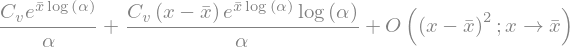

In [8]:
sympy.series(term, x, xbar, 2)

But mostly we will be interested in the expression rather than the error, so we will remove that term with the `removeO` method:

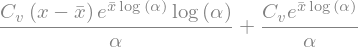

In [9]:
lineq = sympy.series(term, x, xbar, 2).removeO()
lineq

# A note about simplification

You will note that we specified `positive=True` for all our symbols when we created them. This is because the default assumptions about variables in SymPy are that they are complex. And for complex numbers, `log` is not a 1-to-1 function. See if you understand the following:

In [10]:
xbar, alpha = sympy.symbols('xbar, alpha')
sympy.exp(xbar*sympy.log(alpha)).simplify()

In [11]:
xbar, alpha = sympy.symbols('xbar, alpha', positive=True)
sympy.exp(xbar*sympy.log(alpha)).simplify()

Multiple variables
---------------

Assume that $f(x,y)$ is nonlinear. Using a first order Taylor expansion:

$$f(x,y) \approx f(\bar{x},\bar{y}) + \dfrac{df}{dx}\Big|_{\bar{x},\bar{y}} \big(x - \bar{x}\big)+ \dfrac{df}{dy}\Big|_{\bar{x},\bar{y}} \big(y - \bar{y}\big)$$
$$\approx k_0 + k_1x - k_1\bar{x} + k_2y - k_2\bar{y}$$
$$\approx k_1x + k_2y + c$$

This also results is a linear relation.

Unfortunately, SymPy doesn't have a built-in function for multivariate Taylor series, and consecutive application of the `series` function doesn't do exactly what we want.

In [12]:
variables = x, y, z = sympy.symbols('x, y, z')
bars = xbar, ybar, zbar = sympy.symbols('xbar, ybar, zbar')

In [13]:
term_0 = x*y*z

Note that the other variables are assumed to be constant here, so we don't recover the answer we are looking for.

In [14]:
term_0.series(x, xbar, 2).removeO().series(y, ybar, 2).removeO()

The function `tbcontrol.symbolic.linearise` calculates a multivariable linearisation using the textbook formula. Note that it does not handle expressions which include derivatives or equalities, so don't try to pass a full equation, just use it for the nonlinear terms.

In [15]:
import tbcontrol.symbolic

ModuleNotFoundError: No module named 'tbcontrol'

In [16]:
bars, linearexpression = tbcontrol.symbolic.linearise(term_0, variables)
linearexpression

NameError: name 'tbcontrol' is not defined

## Deviation variables

Rewrite the variables in terms of deviations from a reference condition, often the steady-state value. This results in:
- Eliminating the constant terms.
- All initial values become zero.

$$x'(t) = x(t) - \bar{x}$$

How to do this with sympy:

In [22]:
xprime = sympy.symbols("x'", positive=True)

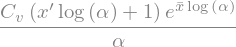

In [24]:
term = C_v*alpha**(x - 1)
lineq = sympy.series(term, x, xbar, 2).removeO()
lineq_deviation = lineq.subs({x: xprime + xbar})
sympy.simplify(lineq_deviation)

<img src = '../2_Time_domain_simulation/tanksystem.png'/>

In [25]:
import scipy.integrate
from matplotlib import pyplot as plt
import numpy as np

In [26]:
#Parameters
A = 1
k = 0.5

In [27]:
# Initial
h0 = 4

In [28]:
#Disturbance
def Fi(t):
    if t > 10:
        return 4
    else:
        return 2

In [29]:
def func(t,h):
    dhdt = 1/A*(Fi(t) - k*h)
    return dhdt

In [30]:
tspan = (0,25)
tsmooth = np.linspace(0,25)

In [31]:
soln = scipy.integrate.solve_ivp(func,tspan,[h0],t_eval=tsmooth,max_step = 0.1)

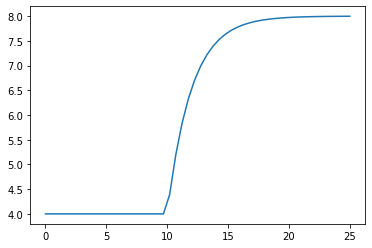

In [32]:
plt.plot(soln.t,soln.y.T)

Now in terms of deviation variables:

In [35]:
def funcprime(t,hprime):
    Finp = Fi(t) - Fi(0)
    dhprimedt = 1/A*(Finp - k*hprime)
    return dhprimedt

In [36]:
soln = scipy.integrate.solve_ivp(funcprime,tspan,[0],t_eval=tsmooth,max_step = 0.1)

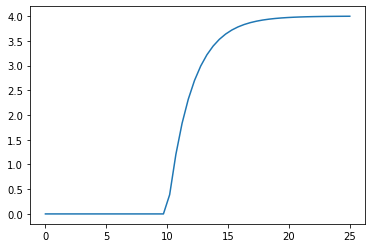

In [37]:
plt.plot(soln.t,soln.y.T)